Import necesseray library and datasets


In [ ]:
#We import necessary libraries and datasets we use sep for seprating the values in csv files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_mat = pd.read_csv("student-mat.csv", sep = ";")
df_por = pd.read_csv("student-por.csv" , sep=";")


In [ ]:
#We check our uploaded datasets

df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [ ]:
# We define our variables 

balance_var = ["goout", "freetime", "activities", "romantic", "studytime"]
academic_outcomes = ["G3", "absences", "failures"]
binary_vars = ["activities", "romantic"]

In [ ]:
df_mat[binary_vars] = df_mat[binary_vars].replace({"yes":1, "no":0})
df_por[binary_vars] = df_por[binary_vars].replace({"yes":1, "no":0})

In [ ]:
# we check if our data has missing values

df_mat[balance_var + academic_outcomes].isnull().sum()

,0
goout,0
freetime,0
activities,0
romantic,0
studytime,0
G3,0
absences,0
failures,0


In [ ]:
df_por[balance_var + academic_outcomes].isnull().sum()

,0
goout,0
freetime,0
activities,0
romantic,0
studytime,0
G3,0
absences,0
failures,0


In [ ]:
#We scale our balance variables for both datasets

scaler_mat = StandardScaler()
X_mat = scaler_mat.fit_transform(df_mat[balance_var])

scaler_por = StandardScaler()
X_por = scaler_por.fit_transform(df_por[balance_var])

In [ ]:
# We did a classification for do predicitons on pass fail status based on absences and failures

df_mat["pass-fail"] = df_mat["G3"] >= 10
df_por["pass-fail"] = df_por["G3"] >= 10
classification_features = balance_var + ["absences", "failures"]

X_mat_classification = df_mat[classification_features]
y_mat_classification = df_mat["pass-fail"]

X_por_classification = df_por[classification_features]
y_por_classification = df_por["pass-fail"]

In [ ]:
#We do train test split for both datasets

X_mat_train, X_mat_test, y_mat_train, y_mat_test = train_test_split(X_mat_classification, y_mat_classification, test_size=0.2, random_state=42)

X_por_train, X_por_test, y_por_train, y_por_test = train_test_split(X_por_classification, y_por_classification, test_size=0.2, random_state=42)


#we did also scaling for this classification 

scaler_mat_classification = StandardScaler()
X_mat_train_scaled = scaler_mat_classification.fit_transform(X_mat_train)
X_mat_test_scaled = scaler_mat_classification.transform(X_mat_test)

scaler_por_classification = StandardScaler()
X_por_train_scaled = scaler_por_classification.fit_transform(X_por_train)
X_por_test_scaled = scaler_por_classification.transform(X_por_test)

In [ ]:
#We did logistic regression to our training set to make predictions

log_reg_mat = LogisticRegression(max_iter=1000, random_state=42)
log_reg_por = LogisticRegression(max_iter=1000, random_state=42)

log_reg_mat.fit(X_mat_train_scaled, y_mat_train)
log_reg_por.fit(X_por_train_scaled, y_por_train)

y_mat_prediction = log_reg_mat.predict(X_mat_test_scaled)
y_por_prediction = log_reg_por.predict(X_por_test_scaled)


In [ ]:
#we print our results for math dataset 
print("\nMATH DATASET Logistic Regression")
print("Accuracy:", accuracy_score(y_mat_test, y_mat_prediction))
print("Confusion Matrix:\n", confusion_matrix(y_mat_test, y_mat_prediction))
print("Classification Report:\n", classification_report(y_mat_test, y_mat_prediction))


MATH DATASET Logistic Regression
Accuracy: 0.7341772151898734
Confusion Matrix:
 [[ 9 18]
 [ 3 49]]
Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.33      0.46        27
        True       0.73      0.94      0.82        52

    accuracy                           0.73        79
   macro avg       0.74      0.64      0.64        79
weighted avg       0.74      0.73      0.70        79



In [ ]:
#we print for results for Portuguase dataset
print("\nPortuguase DATASET Logistic Regression")
print("Accuracy:", accuracy_score(y_por_test, y_por_prediction))
print("Confusion Matrix:\n", confusion_matrix(y_por_test, y_por_prediction))
print("Classification Report:\n", classification_report(y_por_test, y_por_prediction))


Portaguase DATASET Logistic Regression
Accuracy: 0.8923076923076924
Confusion Matrix:
 [[  3  12]
 [  2 113]]
Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.20      0.30        15
        True       0.90      0.98      0.94       115

    accuracy                           0.89       130
   macro avg       0.75      0.59      0.62       130
weighted avg       0.87      0.89      0.87       130



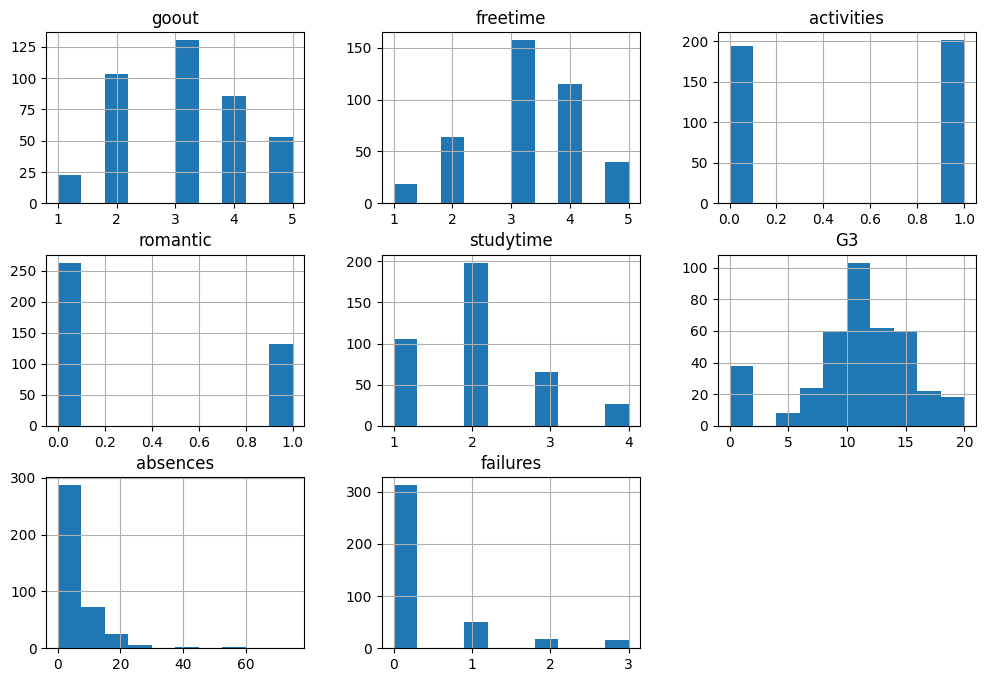

In [ ]:
#We check the both datasets distribuiton with hist plot

df_mat[balance_var + academic_outcomes].hist(figsize=(12,8))
plt.title("Math Distribution")
plt.show()

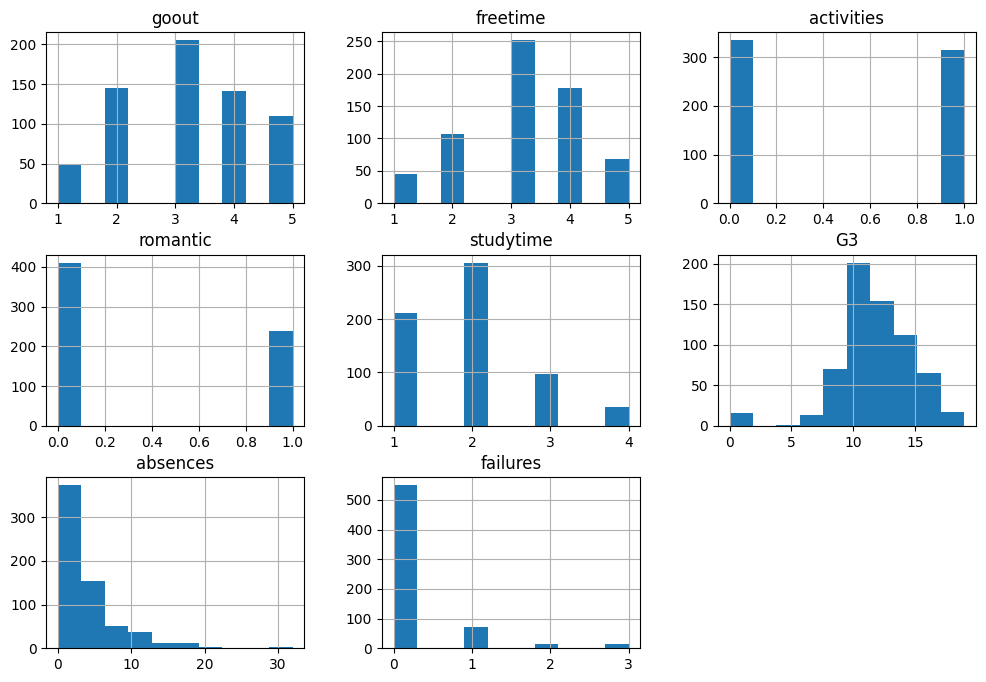

In [ ]:
df_por[balance_var + academic_outcomes].hist(figsize=(12,8))
plt.title("Portaguese Distribution")
plt.show()

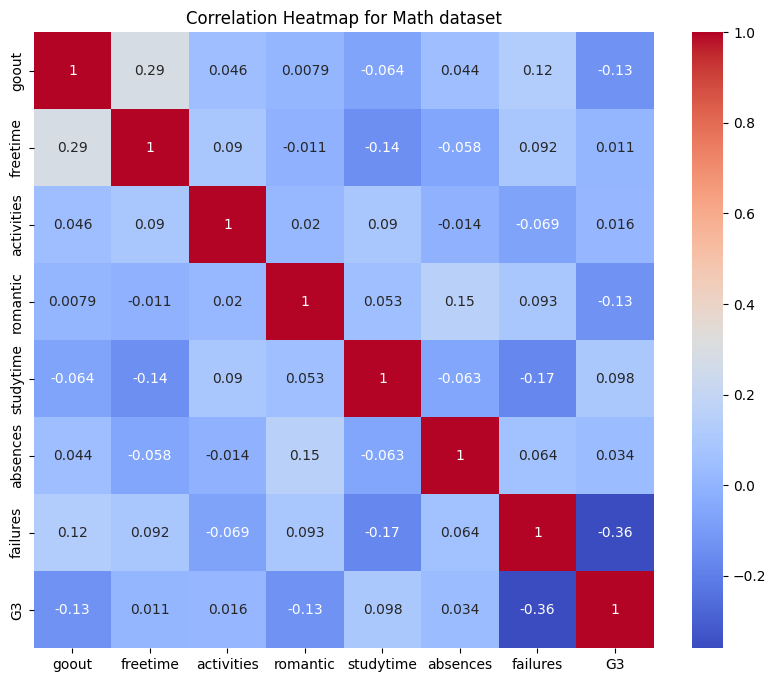

In [ ]:
# Correlation Heatmap for math dataset

plt.figure(figsize=(10,8))
corr_mat = df_mat[classification_features + ["G3"]].corr()
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Math dataset")
plt.show()

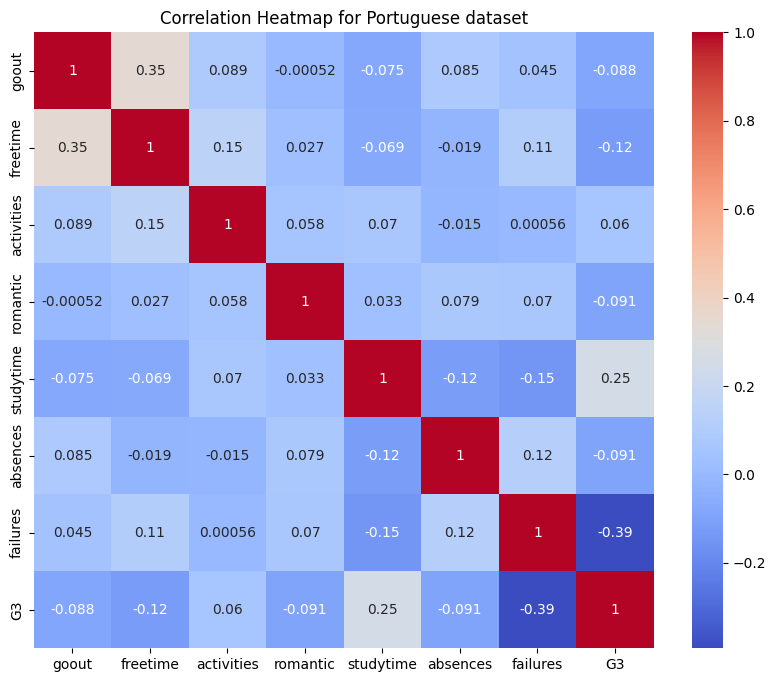

In [ ]:
# Correlation Heatmap for Portuguese dataset

plt.figure(figsize=(10,8))
corr_por = df_por[classification_features + ["G3"]].corr()
sns.heatmap(corr_por, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Portuguese dataset")
plt.show()

In [ ]:
#We apply pca to our data set for reduce the dimesion of our datasets

pca_mat = PCA(n_components=2)
pca_mat_comp = pca_mat.fit_transform(X_mat)
pca_mat_df = pd.DataFrame(pca_mat_comp , columns = ["PC1", "PC2"])
pca_mat_df.head()

,PC1,PC2
0,0.227618,-0.914447
1,-0.332805,-1.030318
2,-0.893229,-1.146189
3,-1.780555,1.725480
4,-0.893229,-1.146189


In [ ]:
#The variance ratio of pca mat 
pca_mat.explained_variance_ratio_

array([0.27151726, 0.22185032])

In [ ]:
pca_por = PCA(n_components=2)
pca_por_comp = pca_por.fit_transform(X_por)
pca_por_df = pd.DataFrame(pca_por_comp , columns = ["PC1", "PC2"])
pca_por_df.head()

,PC1,PC2
0,-0.082962,-0.948059
1,-0.624647,-0.817967
2,-1.166332,-0.687874
3,-1.131465,2.257994
4,-1.166332,-0.687874


In [ ]:
#The variance ratio of pca por
pca_por.explained_variance_ratio_

array([0.2858477 , 0.22071247])

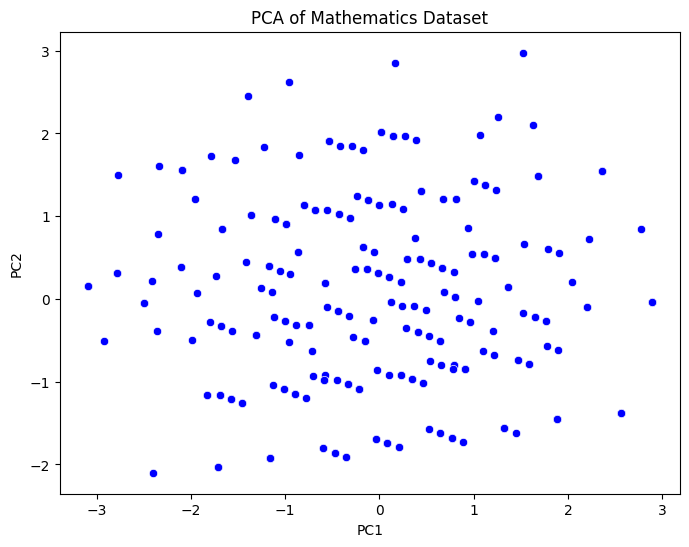

In [ ]:
#PCA Visualization of both datasets 
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1",y="PC2", data = pca_mat_df, color="blue")
plt.title("PCA of Mathematics Dataset")
plt.show()

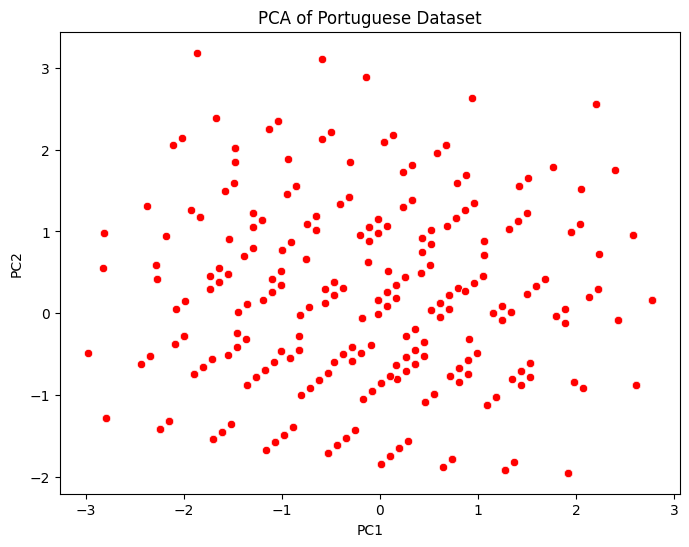

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1",y="PC2", data = pca_por_df, color="red")
plt.title("PCA of Portuguese Dataset")
plt.show()

In [ ]:
# We did clustering for to understand the datasets and we use kmeans algorithm for both datasets

kmeans_mat = KMeans(n_clusters=3, random_state=42)
df_mat["cluster"] = kmeans_mat.fit_predict(X_mat)
df_mat["cluster"].value_counts()

,count
cluster,
2,159
0,151
1,85


In [ ]:
kmeans_por = KMeans(n_clusters=3, random_state=42)
df_por["cluster"] = kmeans_por.fit_predict(X_por)
df_por["cluster"].value_counts()

,count
cluster,
0,239
1,220
2,190


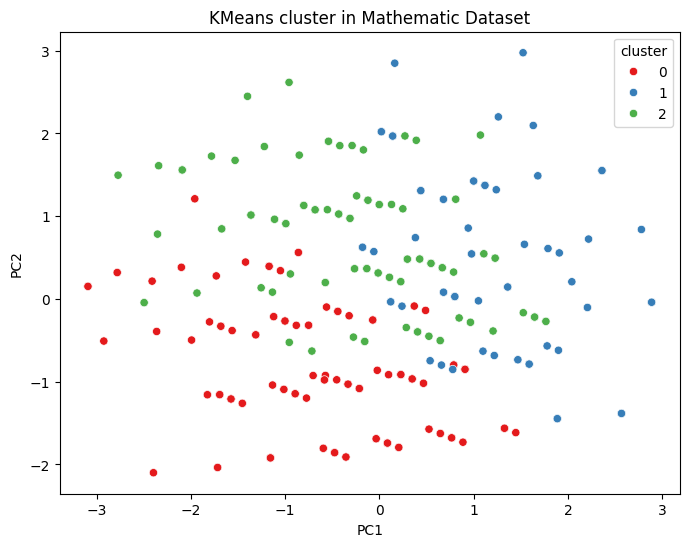

In [ ]:
# Visualize the cluster in pca for math data set 

pca_mat_df["cluster"] = df_mat["cluster"]
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue = "cluster", data=pca_mat_df, palette="Set1")
plt.title("KMeans cluster in Mathematic Dataset")
plt.show()

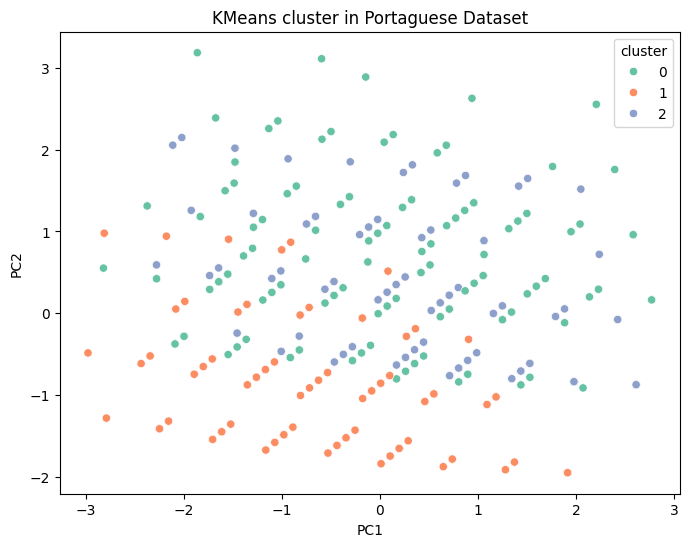

In [ ]:
# Visualize the cluster in pca for portaguese data set

pca_por_df["cluster"] = df_por["cluster"]
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue = "cluster", data=pca_por_df, palette="Set2")
plt.title("KMeans cluster in Portaguese Dataset")
plt.show()

In [ ]:
#cluster summary for math dataset for balance variables and academic outcomes
cluster_sum_mat = df_mat.groupby("cluster")[balance_var + academic_outcomes].mean()
cluster_sum_mat

,goout,freetime,activities,romantic,studytime,G3,absences,failures
cluster,,,,,,,,
0,2.721854,2.880795,0.000000,0.225166,1.993377,10.701987,5.602649,0.258278
1,4.223529,4.117647,0.494118,0.717647,1.941176,9.576471,6.764706,0.623529
2,2.880503,3.100629,1.000000,0.232704,2.125786,10.591195,5.245283,0.251572


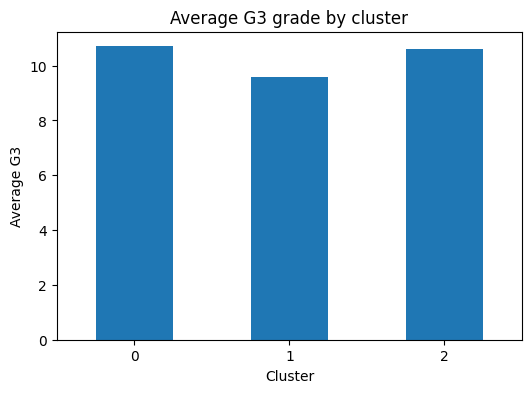

In [ ]:
# We analyze the difference between averga G3 score with our cluster in math dataset

plt.figure(figsize=(6,4))
cluster_sum_mat["G3"].plot(kind="bar")
plt.title("Average G3 grade by cluster")
plt.xlabel("Cluster")
plt.ylabel("Average G3")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#cluster summary for portaguase dataset for balance variables and academic outcomes
cluster_sum_por = df_por.groupby("cluster")[balance_var + academic_outcomes].mean()
cluster_sum_por

,goout,freetime,activities,romantic,studytime,G3,absences,failures
cluster,,,,,,,,
0,3.184100,3.217573,0.523013,1.0,1.966527,11.523013,4.142259,0.276151
1,3.100000,3.054545,0.000000,0.0,1.822727,11.800000,3.509091,0.195455
2,3.284211,3.278947,1.000000,0.0,2.010526,12.510526,3.226316,0.184211


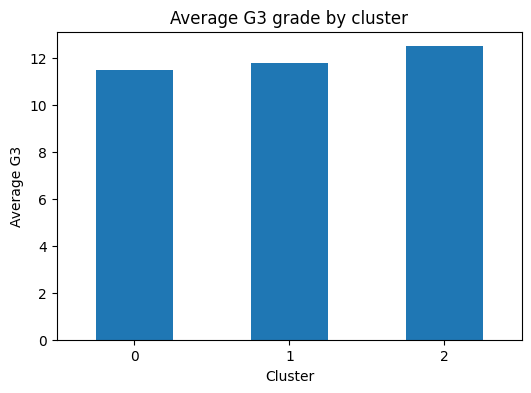

In [ ]:
# We analyze the difference between averga G3 score with our cluster in Portuguese dataset 

plt.figure(figsize=(6,4))
cluster_sum_por["G3"].plot(kind="bar")
plt.title("Average G3 grade by cluster")
plt.xlabel("Cluster")
plt.ylabel("Average G3")
plt.xticks(rotation=0)
plt.show()

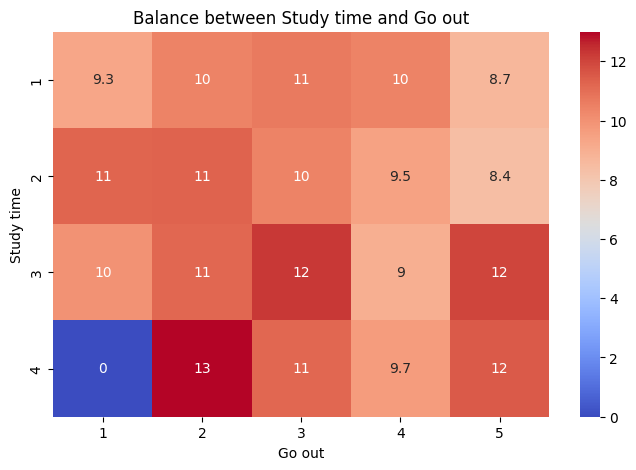

In [ ]:
#General balance heatmap fot study time and go out for math dataset

pivot_mat = df_mat.pivot_table(values="G3", index ="studytime", columns="goout", aggfunc="mean")
plt.figure(figsize=(8,5))
sns.heatmap(pivot_mat, annot=True, cmap="coolwarm")
plt.title("Balance between Study time and Go out")
plt.xlabel("Go out")
plt.ylabel("Study time")
plt.show()

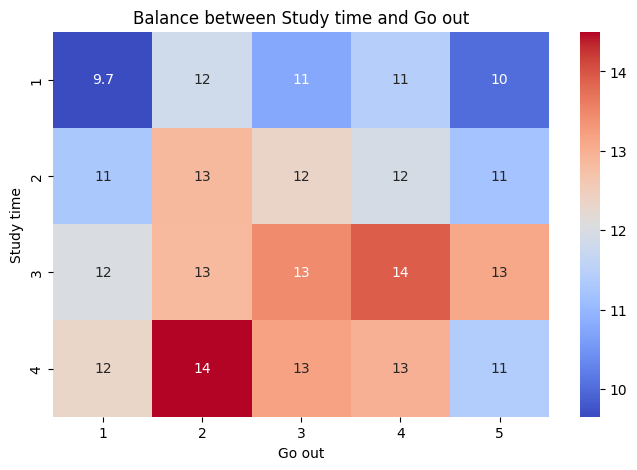

In [ ]:
#General balance heatmap fot study time and go out for portuguese dataset

pivot_por = df_por.pivot_table(values="G3", index ="studytime", columns="goout", aggfunc="mean")
plt.figure(figsize=(8,5))
sns.heatmap(pivot_por, annot=True, cmap="coolwarm")
plt.title("Balance between Study time and Go out")
plt.xlabel("Go out")
plt.ylabel("Study time")
plt.show()